<a href="https://colab.research.google.com/github/MinsooKwak/Data_Analysis/blob/main/HR/%ED%87%B4%EC%A7%81%EC%9D%84_%EC%B4%89%EB%B0%9C%ED%95%98%EB%8A%94_%EC%A3%BC%EC%9A%94_%EC%9A%94%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퇴직을 촉발하는 주요 요인 분석

### Font

In [1]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [2]:
# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
import matplotlib.font_manager as fm  # 폰트 관련 용도
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumGothicCoding',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumGothicCoding']

In [3]:
#폰트종류설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] ='NanumSquare'

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다

current_font()

Python 3.10.12
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


## Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DA_degree/과제/1주차_HR/Data/데이터분석_Expert_HR_데이터.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


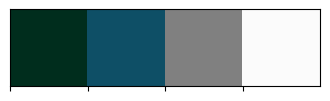

In [7]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

## Data Description

- 개인 특성
  - Age : 나이
  - Over18 : 18세 이상
  - Gender : 성별
  - DistanceFromHome : 집과의 거리
  - MaritalStatus : 결혼 여부

- 교육 관련
  - PerformanceRating : 업무 성과
  - TotalWorkingYears : 경력기간
  - Education : 교육의 정도
  - EducationField : 전공
  - TrainingTimesLastYear : 교육 시간  

- 보상
  - DailyRate : 일 대비 급여 수준
  - HourlyRate : 시간 대비 급여 수준
  - MonthlyIncome : 월 소득
  - MonthlyRate : 월 대비 급여 수준
  - PercentSalaryHike : 급여의 증가분 백분율
  - StockOptionLevel : 스톡옵션 정도

- 업무 관련 수준 및 만족도
  - 수준
    - Department : 업무 분야
    - BusinessTravel : 출장 빈도
    - JobInvolvement : 업무 참여도
    - JobLevel : 업무 수준
    - JobRole : 업무 종류
    - OverTime : 규정 외 노동시간
    - WorkLifeBalance : 일과 생활의 균형 정도
    - YearsAtCompany : 근속 연수
    - YearsInCurrentRole : 현재 역할의 년수
    - NumCompaniesWorkded : 일한 회사의 수
  - 만족도
    - JobSatisfaction : 업무 만족도
    - YearsSinceLastPromotion : 마지막 프로모션
    - YearsWithCurrManager : 현재 관리자와 함께 보낸 시간
    - Attrition : 퇴직 여부
    - EnvironmentSatisfaction : 업무 환경에 대한 만족도
    - RelationshipSatisfaction : 대인관계 만족도

- 기타
  - EmployeeCount : 직원 숫자
  - EmployeeNumber : 직원 ID
  - StandardHours : 표준 시간

### 퇴직의 비율은 어떻게 되는가?

In [8]:
x = df.groupby(['Attrition'])['Attrition'].count()
y = len(df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T
ratio

Attrition,No,Yes
Attrition,0.84,0.16


In [9]:
no_value = ratio.No.values[0]
yes_value = ratio.Yes.values[0]
print(no_value)
print(yes_value)

0.84
0.16


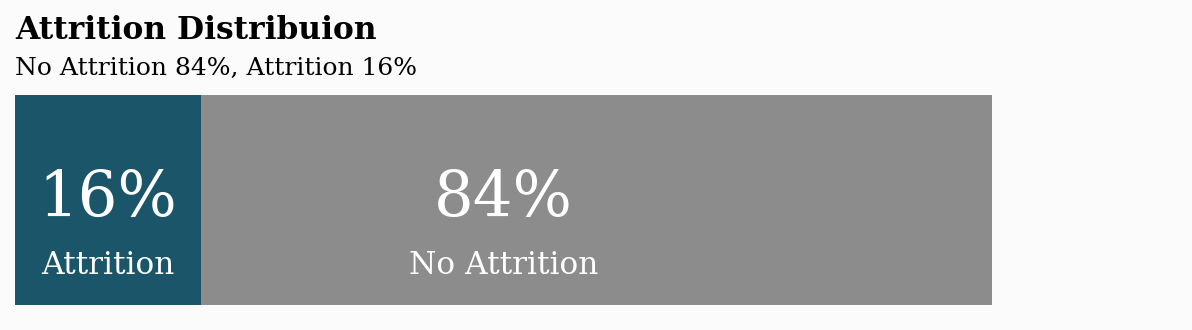

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10, 2), dpi=150)
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.barh(ratio.index, ratio['No'], color='gray', alpha=0.9, label='No Attition')
ax.barh(ratio.index, ratio['Yes'], color='#0e4f66', alpha=0.9, label='Attrition')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)

for s in ['top','left','right','bottom']:
  ax.spines[s].set_visible(False)

# No Attrition percent
for i in ratio.index:
  ax.annotate(f"{int(ratio['No'][i]*100)}%",
              xy = (ratio['No'][i]/2, i),
              va = 'center', ha='center', fontsize=30, fontweight='light', fontfamily='serif',
              color='white')
  ax.annotate(f"No Attrition",
              xy = (ratio['No'][i]/2, -0.25),
              va = 'center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
              color='white')

# Attrition percent
for i in ratio.index:
  ax.annotate(f"{int(ratio['Yes'][i]*100)}%",
              xy = (ratio['Yes'][i]/2, i),
              va = 'center', ha='center', fontsize=30, fontweight='light', fontfamily='serif',
              color='white')
  ax.annotate("Attrition",
              xy = (ratio['Yes'][i]/2, -0.25),
              va = 'center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
              color='white')

# Title
fig.text(0.125, 1.03, "Attrition Distribuion",
         fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.91, "No Attrition 84%, Attrition 16%",
         fontfamily='serif', fontsize=12, fontweight='light')

ax.legend().set_visible(False)

plt.show()

In [11]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [12]:
df.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

## 업무 성과별 요인의 특징

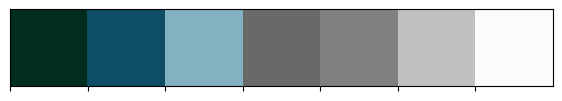

In [13]:
sns.palplot(['#002d1d','#0e4f66','#82b1c2','dimgray','gray','#c0c0c0','#fbfbfb'])

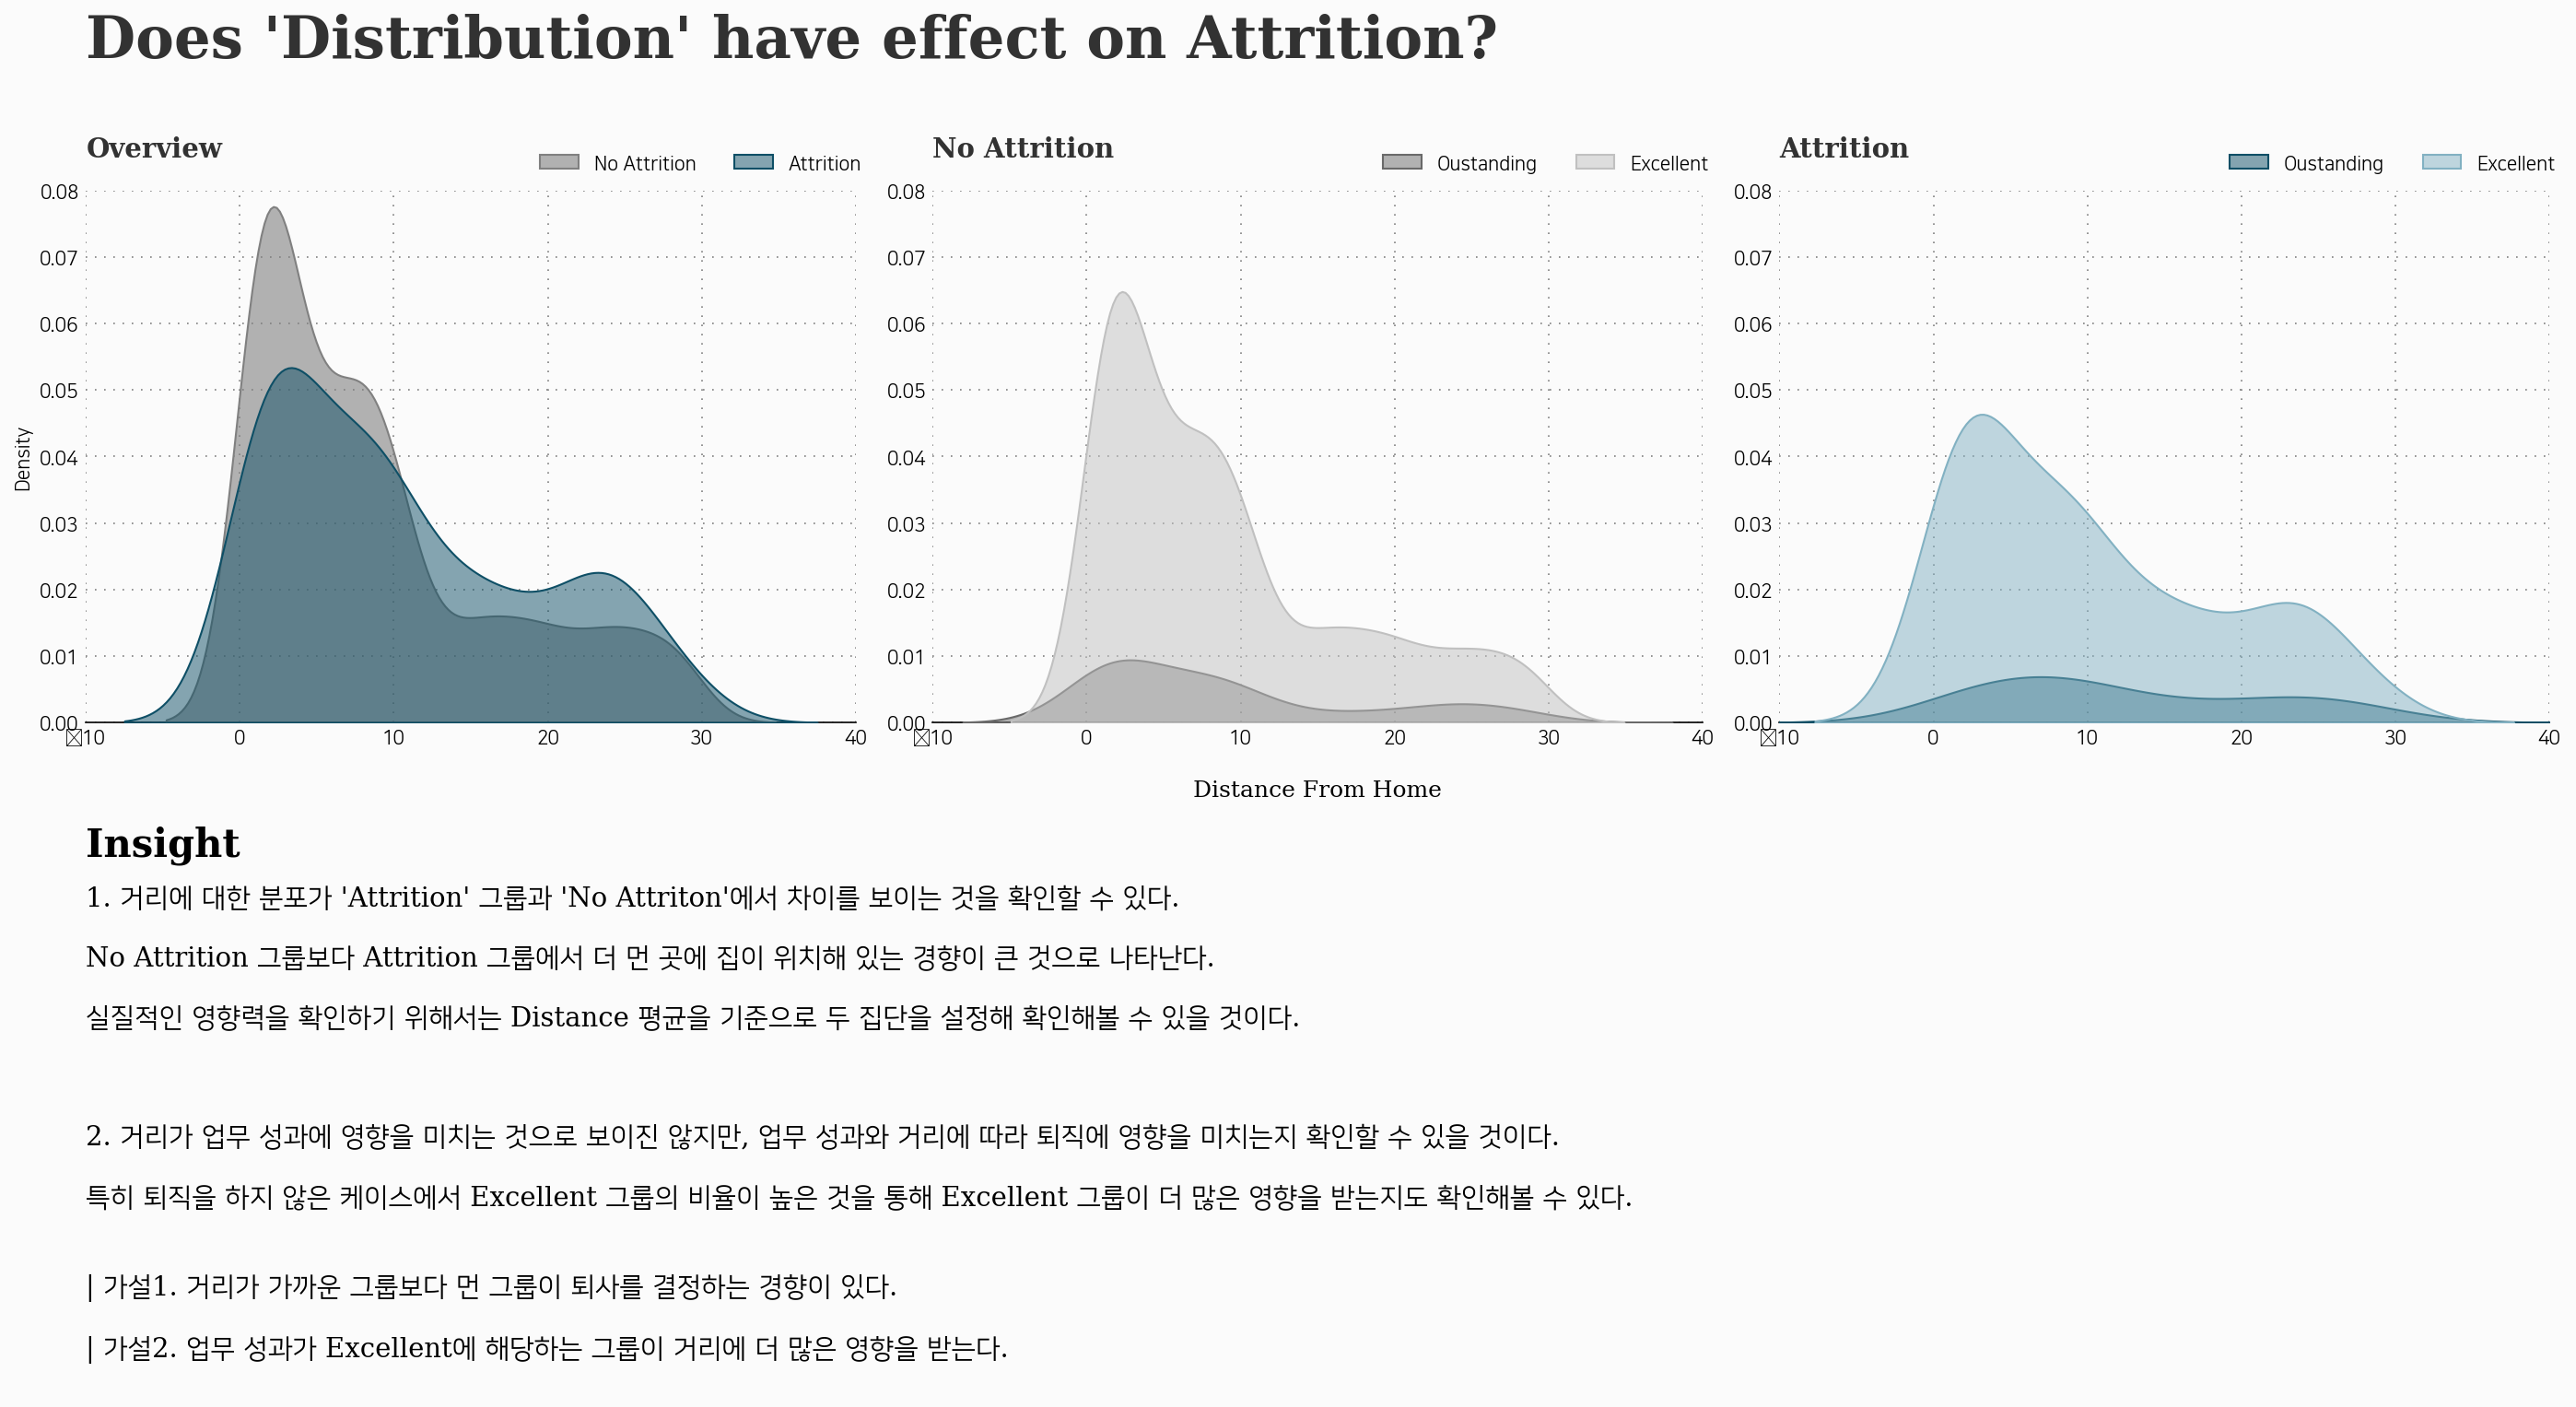

In [14]:
# 배경 색상 및 팔레트
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(23,5), dpi=150)
fig.patch.set_facecolor(background_color)

# ax 설정
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.1, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])



#### A0 - 집과의 거리(DistanceFromHome) # 1~30
ax0.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
train = pd.DataFrame(df[df['Attrition']=='No'])
test = pd.DataFrame(df[df['Attrition']=='Yes'])

## 1) 퇴직 / 퇴직하지 않은 사람들에 대한 비교
sns.kdeplot(train['DistanceFromHome'], ax=ax0, color='gray', shade=True,
            label='No Attrition', zorder=3, alpha=0.6)
sns.kdeplot(test['DistanceFromHome'], ax=ax0, color="#0e4f66", shade=True,
            label='Attrition', zorder=3, alpha=0.5)

ax0.legend(['No Attrition','Attrition'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

ax0.text(-10, 0.085, "Overview", fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')

# 축 범위 지정
ax0.set_xlim(-10,40)
ax0.set_ylim(0,0.08)

## 2) Perfomance에 따른 거리 비교 (퇴직하지 않은 사람)
ax1.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=train,x='DistanceFromHome', ax=ax1, hue='PerformanceRating',
            palette=['#c0c0c0','dimgray'],
            zorder=3, alpha=0.5, shade=True)

ax1.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

ax1.text(-10, 0.085, "No Attrition", fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')

# 축 범위 지정
ax1.set_xlim(-10,40)
ax1.set_ylim(0,0.08)

## Performance에 따른 거리 비교 (퇴직한 사람)
ax2.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=test,x='DistanceFromHome', ax=ax2, hue='PerformanceRating',
            palette=['#82b1c2','#0e4f66'],
            zorder=3, alpha=0.5, shade=True)

ax2.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

# 축 범위 지정
ax2.set_xlim(-10,40)
ax2.set_ylim(0,0.08)

ax2.text(-10, 0.085, "Attrition", fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')

#### Insight
ax0.text(-10, 0.1, "Does 'Distribution' have effect on Attrition?", fontsize=30, fontweight='bold', fontfamily='serif', color='#323232')

dist_insight1 = """

1. 거리에 대한 분포가 'Attrition' 그룹과 'No Attriton'에서 차이를 보이는 것을 확인할 수 있다. \n
No Attrition 그룹보다 Attrition 그룹에서 더 먼 곳에 집이 위치해 있는 경향이 큰 것으로 나타난다.\n
실질적인 영향력을 확인하기 위해서는 Distance 평균을 기준으로 두 집단을 설정해 확인해볼 수 있을 것이다.\n\n

2. 거리가 업무 성과에 영향을 미치는 것으로 보이진 않지만, 업무 성과와 거리에 따라 퇴직에 영향을 미치는지 확인할 수 있을 것이다.\n
특히 퇴직을 하지 않은 케이스에서 Excellent 그룹의 비율이 높은 것을 통해 Excellent 그룹이 더 많은 영향을 받는지도 확인해볼 수 있다. \n

| 가설1. 거리가 가까운 그룹보다 먼 그룹이 퇴사를 결정하는 경향이 있다.\n
| 가설2. 업무 성과가 Excellent에 해당하는 그룹이 거리에 더 많은 영향을 받는다.
"""
ax0.text(-10, -0.02, "Insight", fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-10, -0.1, dist_insight1,fontsize=14, fontweight='light', fontfamily=['serif','NanumSquare'],color='black')

# ax의 색상 배경 색상과 동일하게 채우기
for i in range(0,3):
  locals()['ax'+str(i)].set_facecolor(background_color)

# 눈금, 눈금 레이블 및 격자 선 매개변수 양쪽 축에 적용
for i in range(0,3):
  locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)

# 축 지우기
for s in ['top','right','left']:
  for i in range(0,3):
    locals()['ax'+str(i)].spines[s].set_visible(False)

# x축 이름 설정
ax0.set_xlabel('')
ax1.set_xlabel('\nDistance From Home', fontfamily='serif', fontsize=12, fontweight='light')
ax2.set_xlabel('')

# y축 이름 설정
ax0.set_ylabel('Density')
ax1.set_ylabel('')
ax2.set_ylabel('')
plt.show()

- 수치에 대한 절대량(count)이 아닌 비율(상대정보)를 활용하기 위해 kdeplot을 통해 거리에 대한 snapshot을 확인했다.



In [15]:
df[['MonthlyIncome','MonthlyRate','DailyRate','HourlyRate','PercentSalaryHike','StockOptionLevel']].describe()[1:].T

,mean,std,min,25%,50%,75%,max
MonthlyIncome,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
DailyRate,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
HourlyRate,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
PercentSalaryHike,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StockOptionLevel,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0


<Axes: xlabel='PerformanceRating'>

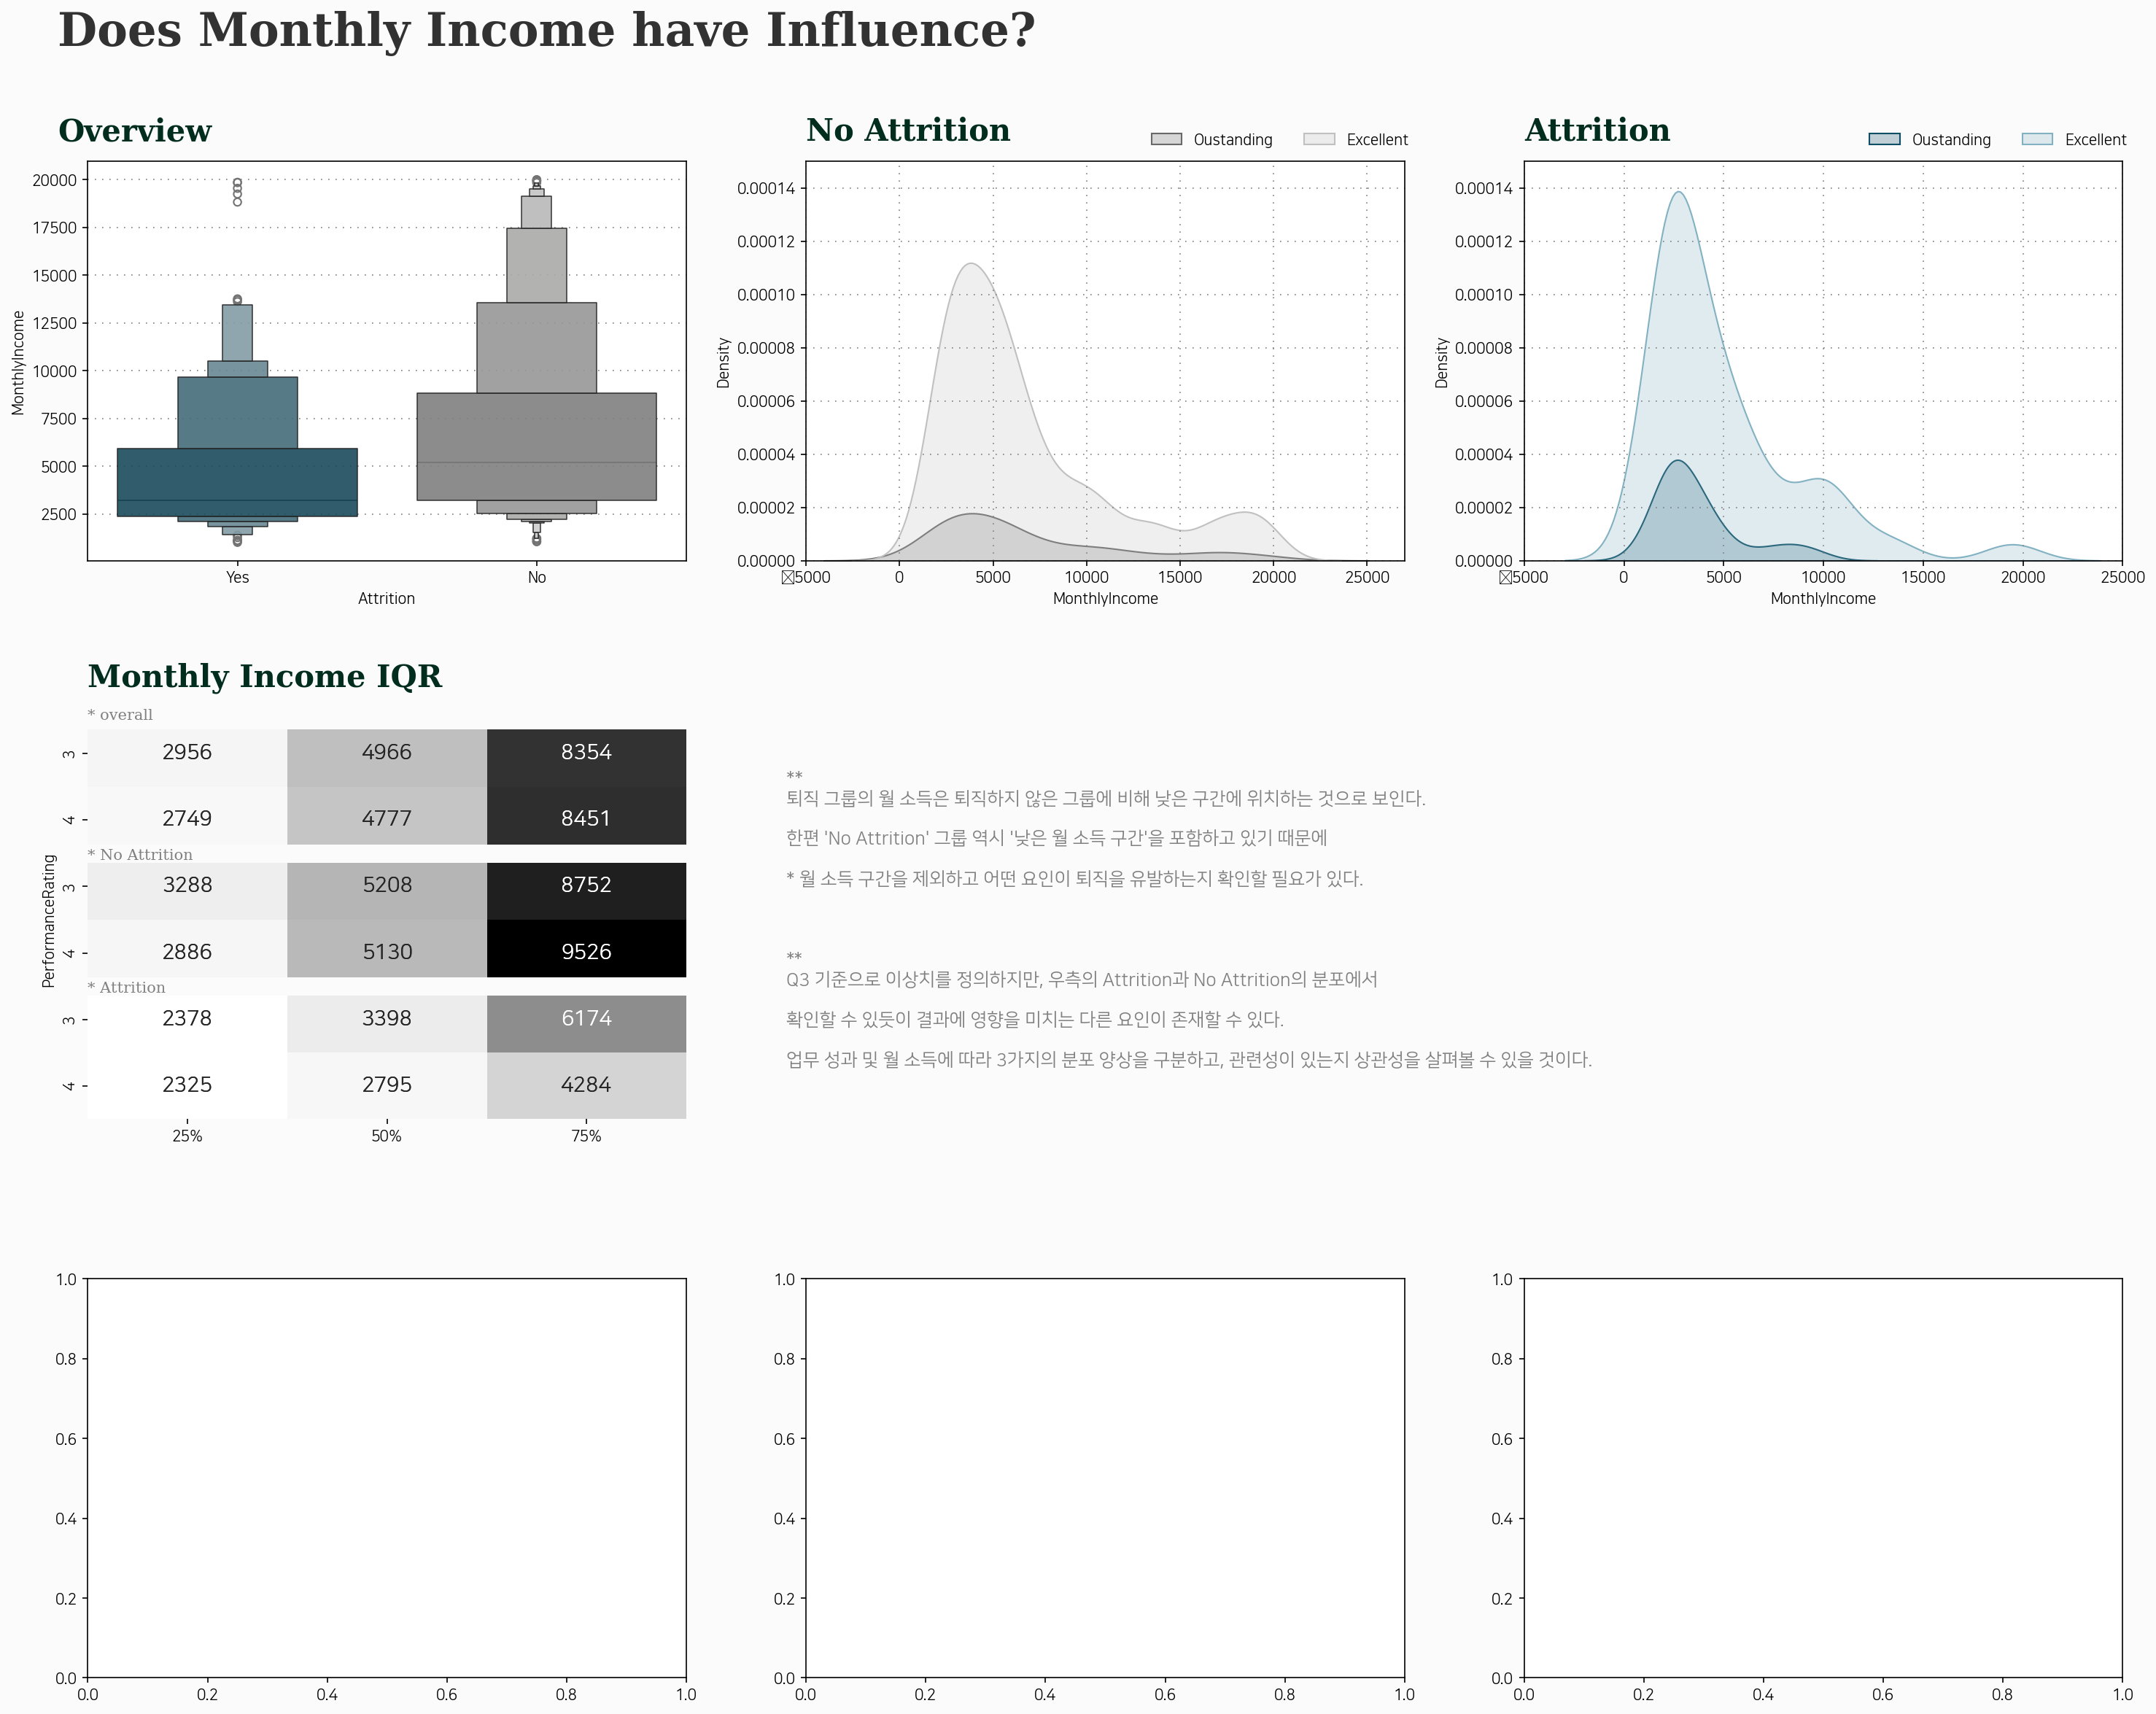

In [16]:
# 배경 색상 및 팔레트
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(24,18), dpi=150)
fig.patch.set_facecolor(background_color)

# ax 설정
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
#ax4 = fig.add_subplot(gs[1, 1])
#ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])


###### Rewards

#### A0 - 월소득(MonthlyIncome)
ax0.text(-0.6, 27000, "Does Monthly Income have Influence?", fontsize=30, fontweight='bold', fontfamily='Serif', color='#323232')
ax0.text(-0.6, 22000, "Overview", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')
ax0.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.boxenplot(data=df, x='Attrition', y='MonthlyIncome', ax=ax0, palette=['#0e4f66','gray'], zorder=3, alpha=0.9)


#### A1 - 퇴직 여부에 따른 월 소득 분포
train = pd.DataFrame(df[df['Attrition']=='No'])
test = pd.DataFrame(df[df['Attrition']=='Yes'])

# No Attrition Group
ax1.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=train, x='MonthlyIncome', hue='PerformanceRating',
            palette=['#c0c0c0','dimgray'], ax=ax1,shade=True)

ax1.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

# 축 범위 지정
ax1.set_xlim(-5000,27000)
ax1.set_ylim(0,0.00015)

ax1.text(-5000, 0.000158, "No Attrition", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')

#ax1.axvline(x=8752, color='gray', linestyle='--', linewidth=1.5) # exellent group q3
#ax1.axvline(x=9526, color='dimgray', linestyle='--', linewidth=1.5) # outstand group q3

# Attrition Group
ax2.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.kdeplot(data=test, x='MonthlyIncome', hue='PerformanceRating',
            palette=['#82b1c2','#0e4f66'], ax=ax2,shade=True)

ax2.legend(['Oustanding','Excellent'], loc='lower right', ncols=2,
           bbox_to_anchor=(1.03,1), facecolor=background_color, edgecolor=background_color)

# 축 범위 지정
ax2.set_xlim(-5000,25000)
ax2.set_ylim(0,0.00015)
ax2.text(-5000, 0.000158, "Attrition", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')


#### A3 - Overall IQR

sns.heatmap(
    pd.concat([
    df.groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='No']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='Yes']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
],axis=0)
    ,cmap='Greys', cbar=False, annot=True, fmt='.0f',annot_kws={"size": 14}, ax=ax3)

ax3.text(0, -0.5, "Monthly Income IQR", fontsize=20, fontweight='bold', fontfamily='serif', color='#002d1d')

#### A4 - No Attrition IQR


monthly_income_IQR_df = pd.concat([
    df.groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='No']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
    pd.DataFrame(df[df['Attrition']=='Yes']).groupby(['PerformanceRating'])['MonthlyIncome'].describe()[['25%','50%','75%']],
],axis=0)

sns.heatmap(monthly_income_IQR_df,cmap='Greys', cbar=False, annot=True, fmt='.0f',annot_kws={"size": 14}, ax=ax3)

ax3.axhline(y=0, color=background_color, linestyle='-', linewidth=12)
ax3.axhline(y=2, color=background_color, linestyle='-', linewidth=12)
ax3.axhline(y=4, color=background_color, linestyle='-', linewidth=12)
ax3.axhline(y=8, color=background_color, linestyle='-', linewidth=12)

ax3.text(0, 0, "* overall", fontsize=10, fontweight='light', fontfamily='serif', color='gray')
ax3.text(0, 2.1, "* No Attrition", fontsize=10, fontweight='light', fontfamily='serif', color='gray')
ax3.text(0, 4.1, "* Attrition", fontsize=10, fontweight='light', fontfamily='serif', color='gray')

# Insight
mon_insight ="""
**
퇴직 그룹의 월 소득은 퇴직하지 않은 그룹에 비해 낮은 구간에 위치하는 것으로 보인다. \n
한편 'No Attrition' 그룹 역시 '낮은 월 소득 구간'을 포함하고 있기 때문에 \n
* 월 소득 구간을 제외하고 어떤 요인이 퇴직을 유발하는지 확인할 필요가 있다.\n


**
Q3 기준으로 이상치를 정의하지만, 우측의 Attrition과 No Attrition의 분포에서 \n
확인할 수 있듯이 결과에 영향을 미치는 다른 요인이 존재할 수 있다. \n
업무 성과 및 월 소득에 따라 3가지의 분포 양상을 구분하고, 관련성이 있는지 상관성을 살펴볼 수 있을 것이다.
"""
ax3.text(3.5, 5.5, mon_insight, fontsize=12, fontweight='light', fontfamily=['NanumSquare','serif'], color='gray')

#### A5 -
sns.scatterplot(monthly_income_IQR_df, ax=ax)

#----------------------------------------------------------


#### A4 - 월 대비 급여 수준


#### A5 - 일 대비 급여 수준


#----------------------------------------------------------
#### 업무환경에 대한 만족도(EnvironmentSatisfaction)

#### 업무성과(PerformanceRating)

#### 퇴직
